# BioCliq Technologies

##### Name : Hari Om Swarup S A
##### SRN : PES2UG20CS132
##### Contact : +91 99021 06941

## Assesment : Perform Lung Segmentation
Instructions
1. Execute segmentation exclusively for the lungs
2. The masks are available for the left lung (labelled 3), right lung (labelled 4), and trachea(labelled 5)
3. Eliminate the trachea label, amalgamate the left and right masks into a single label, and conduct segmentation for the entire lung.

### 1. Import Python Modules and unzip files

In [1]:
import os
import gzip
import shutil
import random as rd
import nibabel as nib
import cv2
import vedo
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def extract_gz(folder_path, save_path): 
    """
    Converts the .nii.gz files in the folder_path to .nii files and saves them in the save_path
    basically to decompress the files
    """
    files = os.listdir(folder_path)
    for f in files:
        with gzip.open(f"{folder_path}/{f}", "rb") as asd:
            with open(f"{save_path}/{f[:-3]}", "wb") as sdf:
                shutil.copyfileobj(asd, sdf)

In [ ]:
# Convert those .nii.gz files to .nii files from the "imagesTr" and "labelsTr" folders

extract_gz("Dataset/imagesTr", "Dataset/Images")
extract_gz("Dataset/labelsTr", "Dataset/Labels")

### 2. Visualize the data

In [2]:
image_list = os.listdir("./Dataset/Images") # load the images
label_list = os.listdir("./Dataset/Labels") # Load the label masks

In [3]:
print(len(image_list), len(label_list))

45 45


In [36]:
# check size of the 3D images
rannum = rd.randint(0, len(image_list)) # random number to select a random image
test_image = nib.load(f"./Dataset/Images/{image_list[rannum]}").get_fdata() # load the image
test_label = nib.load(f"./Dataset/Labels/{label_list[rannum]}").get_fdata() # load the image
print(test_image.shape, test_label.shape)

(512, 512, 280) (512, 512, 280)


In [52]:
def display(real, mask):
    # View the images
    zlen, ylen, xlen = real.shape
    z_slice, y_slice, x_slice = zlen//2, ylen//2, xlen//2 # get the middle slice of the image
    # print(z_slice, y_slice, x_slice)
    # Creating a functionality to view the images
    fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))


    axes[0, 0].imshow(np.rot90(real[:, :, x_slice]))
    axes[0, 1].imshow(np.rot90(real[:, y_slice, :]))
    axes[0, 2].imshow(np.rot90(real[z_slice, :, :]))
    axes[0, 0].set_title("Axial Slice")
    axes[0, 0].set_ylabel("CT Scan - Original", fontsize = 12)

    axes[1, 0].imshow(np.rot90(real[:, :, x_slice]), cmap = "gray")
    axes[1, 1].imshow(np.rot90(real[:, y_slice, :]), cmap = "gray")
    axes[1, 2].imshow(np.rot90(real[z_slice, :, :]), cmap = "gray")
    axes[0, 1].set_title("Coronal Slice")
    axes[1, 0].set_ylabel("CT Scan - Grayscaled", fontsize = 12)


    axes[2, 0].imshow(np.rot90(mask[:, :, x_slice]))
    axes[2, 1].imshow(np.rot90(mask[:, y_slice, :]))
    axes[2, 2].imshow(np.rot90(mask[z_slice, :, :]))
    axes[0, 2].set_title("Sagittal Slice")
    axes[2, 0].set_ylabel("Segmented Mask", fontsize = 12)


    # (512, 512, 149) <=> (top view from the head, front view of the body, side view of the body) <=> (axial slice, coronal slice, sagittal slice)

    plt.show()


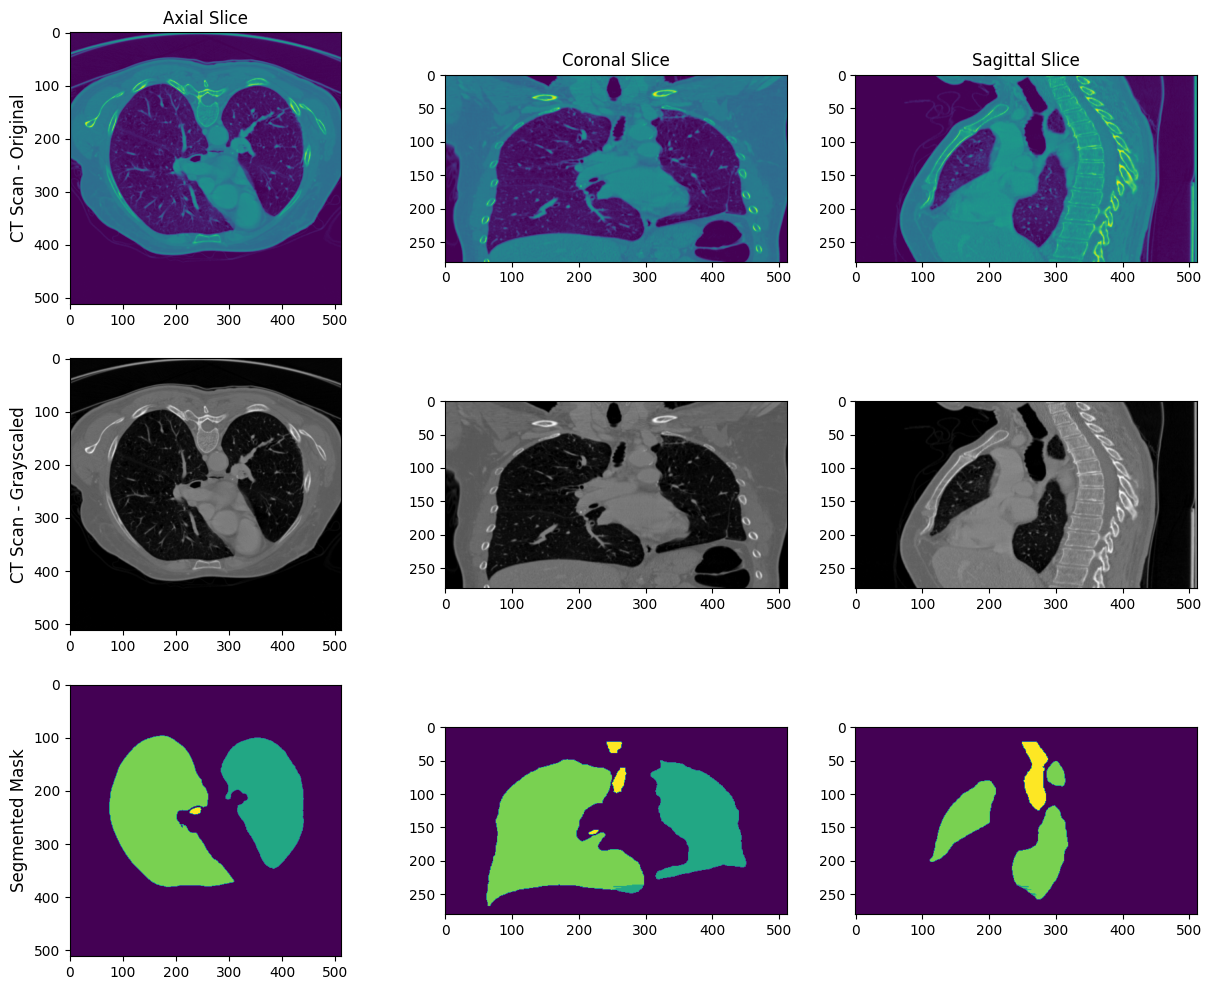

In [53]:
display(test_image, test_label)

### 3. Excluding/Cropping out Trachea from the Mask
- So, from the dataset, I can conclude that "imagesTr" contains 48 patients Lung CT scans and also "masksTr" contains the masks for the same patients in 3D model.
- From the above image, at the Segmented Mask row of a particular patient, we can see that it is segmented/distinguished into 3 colored parts, 

| Portion | Colour | Label |
|--|--|--|
| Left Lung | Lime Green | 3 |
| Right Lung | Dark Green | 4 |
| Trachea | Yellow | 5 |

- Task is to remove Trachea from the 3D Mask image.


In [49]:
# Iterate through the masked images by removing the trachea label

for every in label_list:
    img = nib.load(f"./Dataset/Labels/{every}")
    croppedimg = img.get_fdata()
    croppedimg[croppedimg == 5.0] = 0.0
    croppedimg[(croppedimg == 3.0) | (croppedimg == 4.0)] = 1.0
    modified = nib.Nifti1Image(croppedimg, img.affine)
    nib.save(modified, f"./Dataset/Modified/{every}")

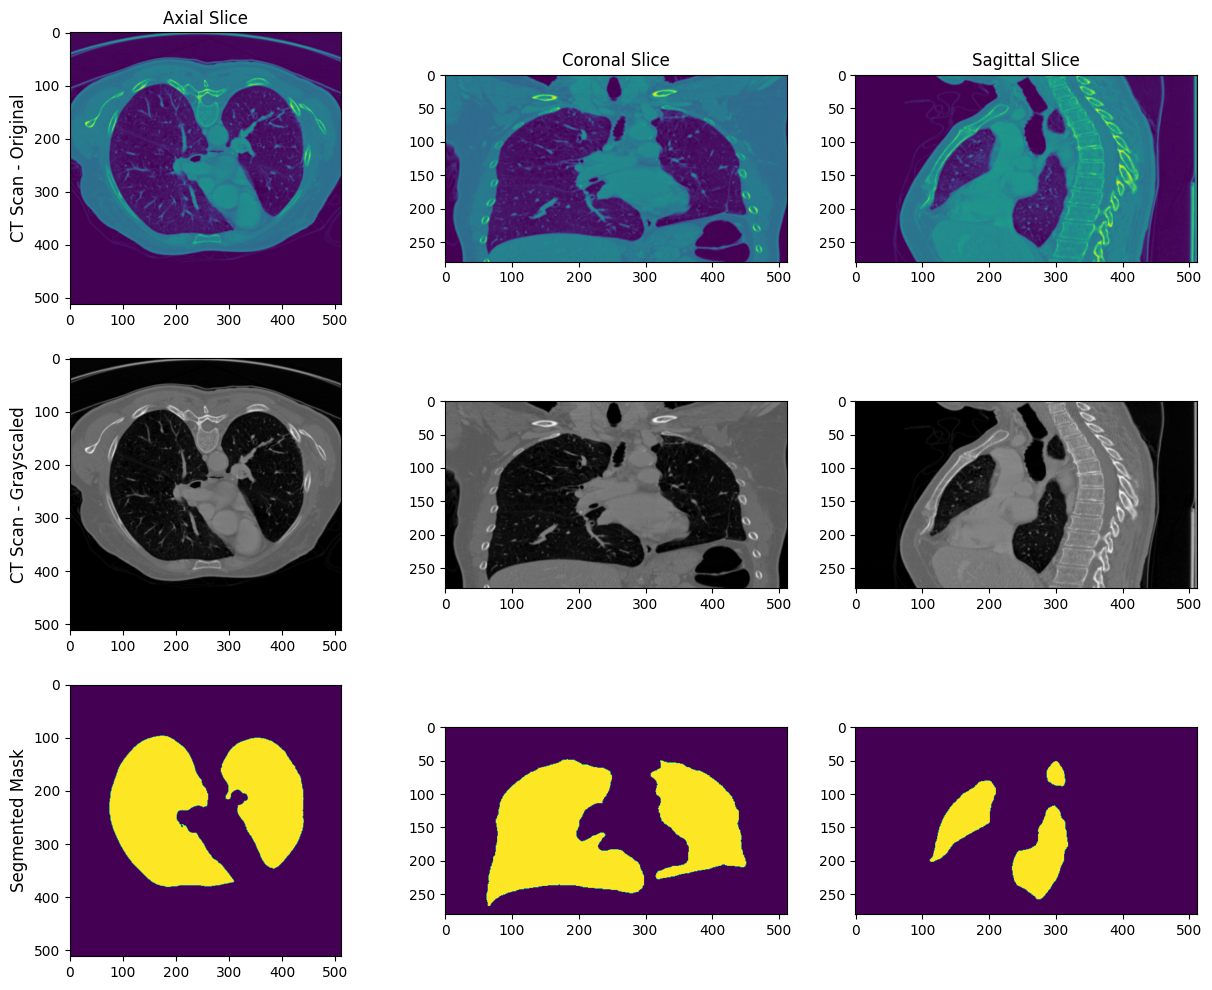

In [54]:
modified_list = os.listdir("./Dataset/Modified") # Load the label masks
test_modified = nib.load(f"./Dataset/Modified/{modified_list[rannum]}").get_fdata() # load the image

display(test_image, test_modified)

### 4. Train Machine Learning Model?